<a href="https://colab.research.google.com/github/greywolf37/data_science_projects/blob/master/ESE542_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


## PROBLEM 1

### P1 Part a

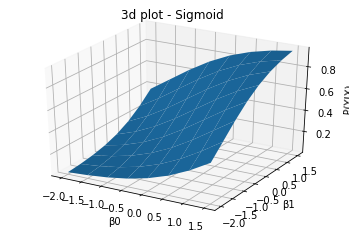

In [ ]:
#Given values for the model
x = 1
b0 = np.arange(-2,2,0.5)
b1 = np.arange(-2,2,0.5)
b0, b1= np.meshgrid(b0,b1)
#Sigmoid Function

def sigmoid(x):
  return (1/(1+np.exp(-x)))


def sigmoid_surface_plot(x, b0, b1):
  y =  sigmoid(b0+b1*x)

  ax = plt.axes(projection = "3d")
  surf = ax.plot_surface(b0,b1,y)
  ax.set_xlabel( 'β0' )
  ax.set_ylabel( 'β1' )
  ax.set_zlabel( 'P(Y|X)' )
  plt.title('3d plot - Sigmoid ')
  plt.show()

sigmoid_surface_plot(x, b0, b1)

### P1 Part b 

$$ln\ L(β_{0},β_{1}) = - \sum_{i= 1}^m ln(1 +e^{−y_{i}(β_{0} + β_{1} x_{i}}))$$



*   1



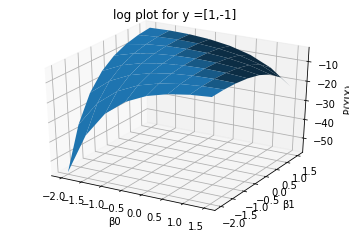

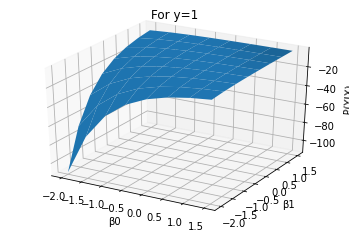

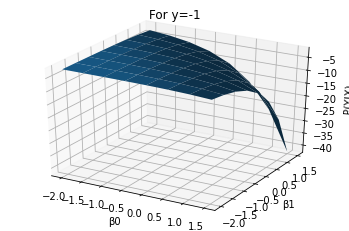

In [ ]:

def like_fun(X, Y):
  return -sum([1 + np.exp(-1*y*(b0 + b1*x))for x,y in zip(X,Y)])
  
X = [1, 1]
Y = [-1, 1]
b0 = np.arange(-2,2,0.5)
b1 = np.arange(-2,2,0.5)
b0, b1= np.meshgrid(b0,b1)

def log_surface_plot(X, Y, b0, b1):  
  l = like_fun(X,Y)
  ax = plt.axes(projection = "3d")
  surf = ax.plot_surface(b0,b1,l)
  ax.set_xlabel( 'β0' )
  ax.set_ylabel( 'β1' )
  ax.set_zlabel( 'P(Y|X)' )
  plt.title('log plot for y =[1,-1]')
  plt.show()

def like_fun_ind(X, y):
  sum = 0
  for i in range(len(X)):
    sum -= 1 + np.exp(-y*(b0 + b1*X[i]))
  return sum


def log_plot_ind(X, y, b0, b1):
  l = like_fun_ind(X,y)
  ax = plt.axes(projection = "3d")
  surf = ax.plot_surface(b0,b1,l)
  ax.set_xlabel( 'β0' )
  ax.set_ylabel( 'β1' )
  ax.set_zlabel( 'P(Y|X)' )
  plt.title('For y=%i' %y)
  plt.show()


log_surface_plot(X, Y, b0, b1)
log_plot_ind(X, 1, b0, b1)
log_plot_ind(X, -1, b0, b1)

## PROBLEM 2

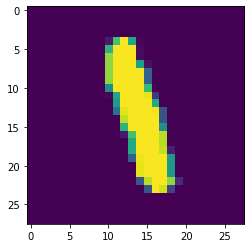

In [ ]:
#reshaping the data for visualization 

data_new = np.empty([len(label),28,28])

for i in range(len(data)):
  data_new[i] = data[i].reshape((28,-1))

# Picture for '0'
plt.imshow(data_new[100], cmap = 'gray')

# Picture for '1'
plt.imshow(data_new[9000])


iter : 0 accuracy : 0.6935047361299053 loss_test : [3.39056664]
iter : 1 accuracy : 0.7110960757780784 loss_test : [3.16478508]
iter : 2 accuracy : 0.7239512855209743 loss_test : [2.93865994]
iter : 3 accuracy : 0.7357916102841678 loss_test : [2.71529887]
iter : 4 accuracy : 0.7489851150202977 loss_test : [2.49690867]
iter : 5 accuracy : 0.7604871447902571 loss_test : [2.285137]
iter : 6 accuracy : 0.7716508795669824 loss_test : [2.08208561]
iter : 7 accuracy : 0.7838294993234101 loss_test : [1.8889093]
iter : 8 accuracy : 0.7943166441136671 loss_test : [1.70786694]
iter : 9 accuracy : 0.8017591339648173 loss_test : [1.54125677]
iter : 10 accuracy : 0.8119079837618404 loss_test : [1.38937097]
iter : 11 accuracy : 0.8220568335588633 loss_test : [1.25184116]
iter : 12 accuracy : 0.8325439783491204 loss_test : [1.1286036]
iter : 13 accuracy : 0.8403247631935047 loss_test : [1.01901365]
iter : 14 accuracy : 0.8501353179972937 loss_test : [0.92189151]
iter : 15 accuracy : 0.857916102841678 

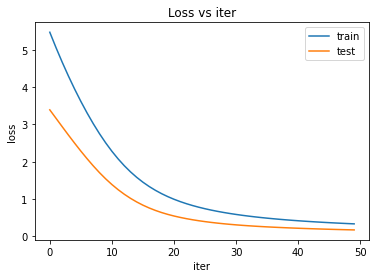

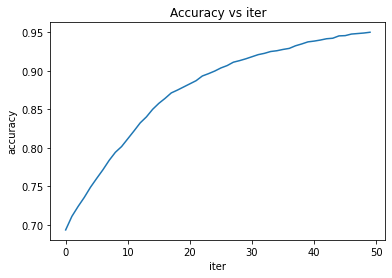

In [ ]:

from sklearn.model_selection import train_test_split


def visualize(data, label):

  data_new = np.empty([len(label),28,28])
  for i in range(len(data)):
    data_new[i] = data[i].reshape((28,-1))
  plt.imshow(data_new[100], cmap = 'gray')   # Picture for '0'
  plt.imshow(data_new[9000])  # Picture for '1'


def normalize_data(data):
  return data / 255


def assign(lable):
  label[label == 1] = -1
  label[label == 0] = 1
  return label


def compute_loss (X, y, b , b0):
  return 1/len(y)*sum([ np.log(1 + np.exp(-y[i] * (b0 + np.dot(b, X[i])))) for i in range(len(y))])


def compute_gradient(X_train, y_train, b, b0):
  
  db0, db = 0, 0
  for i in range(len(y_train)):
    expo = np.exp(-y_train[i]*(b0 + np.dot(b, X_train[i])))
    fract = expo/(1+expo)
    db0 -= (fract  * y_train[i]) / len(y_train)
    db -= fract *(y_train[i] * X_train[i]) / len(y_train)
  return db, db0


def predict(X_test, y_test, b, b0) :
  
  y_pred = np.empty(y_test.shape)
  for i in range(len(y_test)):
    y_prob = 1 / (1 + np.exp(-y_test[i]*(b0+np.dot(b, X_test[i]))))
    if y_test[i] == 1:
      if y_prob >= 0.5 :
        y_pred[i] = 1
      else:
        y_pred[i] = -1
    else:
      if y_prob < 0.5 :
        y_pred[i] = -1
      else:
        y_pred[i] = 1

      y_pred[i] = y_test[i]
  return y_pred


def plot_loss(loss_train, loss_test):
  plt.plot(loss_train, label = 'train')
  plt.plot(loss_test, label = 'test')
  plt.legend(['train', 'test'])
  plt.xlabel('iter')
  plt.ylabel('loss')
  plt.title('Loss vs iter')
  plt.show()

def plot_accuracy(accuracy_test):
  plt.plot(accuracy_test)
  plt.xlabel('iter')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs iter')
  plt.show()


if __name__ == '__main__' :
  
  # Loading the data
  data = np.load('data.npy')
  label = np.load('label.npy')

  # Normalize Data
  data = normalize_data(data)
  label = assign(label)

  # Split the data to train and test sets
  X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

  # Initializing the parameters 
  b   = np.random.randn(1, X_train.shape[1])
  b0 = np.random.randn(1)
  
  # Learning Rate
  lr = 0.05
  loss_test, loss_train = [], []
  accuracy_test = []
  for _ in range(50):
    
    # Compute loss
    loss = compute_loss(X_train, y_train, b, b0)

    # Compute Gradients
    db, db0 = compute_gradient(X_train, y_train, b, b0) 

    # Update Parameters
    b0 -= lr * db0
    b -= lr * db 

    # Compute Accuracy and Loss on Test set

    y_pred = predict(X_test, y_test, b, b0)
    loss_test_temp = compute_loss(X_test, y_pred, b, b0)

    acc_test = sum(y_test == y_pred)/len(y_test)
    print('iter :',  _ , 'accuracy :', acc_test, 'loss_test :', loss_test_temp)
    
    loss_train.append(loss)
    loss_test.append(loss_test_temp)
    accuracy_test.append(acc_test)


plot_loss(loss_train, loss_test)
plot_accuracy(accuracy_test)

iter : 0 accuracy : 0.8308525033829499 loss_test : [3.29092992]
iter : 1 accuracy : 0.8332205683355887 loss_test : [3.01471078]
iter : 2 accuracy : 0.8355886332882273 loss_test : [2.75668096]
iter : 3 accuracy : 0.8372801082543978 loss_test : [2.51966515]
iter : 4 accuracy : 0.8416779431664412 loss_test : [2.30487534]
iter : 5 accuracy : 0.8447225981055481 loss_test : [2.11218697]
iter : 6 accuracy : 0.8470906630581867 loss_test : [1.9405682]
iter : 7 accuracy : 0.8508119079837618 loss_test : [1.78818596]
iter : 8 accuracy : 0.8552097428958051 loss_test : [1.65262163]
iter : 9 accuracy : 0.8599458728010826 loss_test : [1.53144068]
iter : 10 accuracy : 0.8640054127198917 loss_test : [1.42273699]
iter : 11 accuracy : 0.8677266576454669 loss_test : [1.32506902]
iter : 12 accuracy : 0.8697564276048715 loss_test : [1.23709265]
iter : 13 accuracy : 0.8734776725304465 loss_test : [1.15768928]
iter : 14 accuracy : 0.8761840324763194 loss_test : [1.08582582]
iter : 15 accuracy : 0.8805818673883

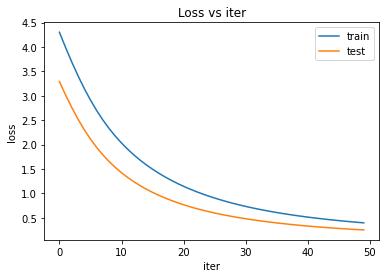

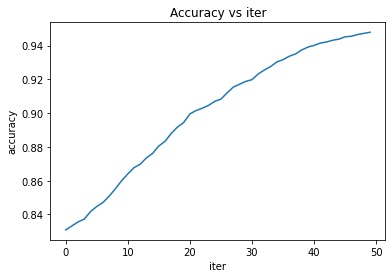

In [ ]:

from sklearn.model_selection import train_test_split


def visualize(data, label):

  data_new = np.empty([len(label),28,28])
  for i in range(len(data)):
    data_new[i] = data[i].reshape((28,-1))
  plt.imshow(data_new[100], cmap = 'gray')   # Picture for '0'
  plt.imshow(data_new[9000])  # Picture for '1'


def normalize_data(data):
  return data / 255


def assign(lable):
  label[label == 1] = -1
  label[label == 0] = 1
  return label


def compute_loss (X, y, b , b0):
  return 1/len(y)*sum([ np.log(1 + np.exp(-y[i] * (b0 + np.dot(b, X[i])))) for i in range(len(y))])


def compute_gradient(X_train, y_train, b, b0):
  
  db0, db = 0, 0
  for i in range(len(y_train)):
    expo = np.exp(-y_train[i]*(b0 + np.dot(b, X_train[i])))
    fract = expo/(1+expo)
    db0 -= (fract  * y_train[i]) / len(y_train)
    db -= fract *(y_train[i] * X_train[i]) / len(y_train)
  return db, db0


def predict(X_test, y_test, b, b0) :
  
  y_pred = np.empty(y_test.shape)
  for i in range(len(y_test)):
    if y_test[i] == 1:
      y_prob = 1 / (1 + np.exp(-y_test[i]*(b0+np.dot(b, X_test[i]))))
      if y_prob >= 0.5 :
        y_pred[i] = 1
      else:
        y_pred[i] = -1
    else:
      y_pred[i] = y_test[i]
  return y_pred


def plot_loss(loss_train, loss_test):
  plt.plot(loss_train, label = 'train')
  plt.plot(loss_test, label = 'test')
  plt.legend(['train', 'test'])
  plt.xlabel('iter')
  plt.ylabel('loss')
  plt.title('Loss vs iter')
  plt.show()

def plot_accuracy(accuracy_test):
  plt.plot(accuracy_test)
  plt.xlabel('iter')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs iter')
  plt.show()


if __name__ == '__main__' :
  
  # Loading the data
  data = np.load('data.npy')
  label = np.load('label.npy')

  # Normalize Data
  data = normalize_data(data)
  label = assign(label)

  # Split the data to train and test sets
  X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

  # Initializing the parameters 
  b   = np.random.randn(1, X_train.shape[1])
  b0 = np.random.randn(1)
  
  # Learning Rate
  lr = 0.05
  loss_test, loss_train = [], []
  accuracy_test = []
  for _ in range(50):
    
    # Compute loss
    loss = compute_loss(X_train, y_train, b, b0)

    # Compute Gradients
    db, db0 = compute_gradient(X_train, y_train, b, b0) 

    # Update Parameters
    b0 -= lr * db0
    b -= lr * db 

    # Compute Accuracy and Loss on Test set

    y_pred = predict(X_test, y_test, b, b0)
    loss_test_temp = compute_loss(X_test, y_pred, b, b0)

    acc_test = sum(y_test == y_pred)/len(y_test)
    print('iter :',  _ , 'accuracy :', acc_test, 'loss_test :', loss_test_temp)
    
    loss_train.append(loss)
    loss_test.append(loss_test_temp)
    accuracy_test.append(acc_test)


plot_loss(loss_train, loss_test)
plot_accuracy(accuracy_test)

## PROBLEM 3